In [49]:
import matplotlib.pylab as plt
import math
import statistics

In [50]:
filename = "runs_2022_06_06-15_59_41.txt"

In [51]:
lines = []
params = [] #[n,h,p,d0,d1,d2]
lp_results = [] #[flow,time]
br_results = [] #[flow,time]
he_results = [] #[flow,time]

with open(filename,'r') as f:
    lines = f.readlines()

i = 0
while i < len(lines):
    
    n,h,p,d0,d1,d2 = lines[i].strip().split(' ')
    params.append([int(n),int(h),float(p),int(d0),int(d1),int(d2)])
    
    i+=1
    flow,time = lines[i].strip().split(' ')
    lp_results.append([float(flow),float(time)])
    
    i+=1
    flow,time = lines[i].strip().split(' ')
    br_results.append([float(flow),float(time)])
    
    i+=1
    flow,time = lines[i].strip().split(' ')
    he_results.append([float(flow),float(time)])
    
    i+=1

In [52]:
br_error = [(lp_results[i][0] - br_results[i][0])/lp_results[i][0]*100 for i in range(len(br_results))]
he_error = [(lp_results[i][0] - he_results[i][0])/lp_results[i][0]*100 for i in range(len(he_results))]

In [53]:
he_error

[0.0,
 0.8018548932470292,
 0.0,
 19.793250228032836,
 1.323641584780365,
 2.627070245573958,
 0.0,
 35.74483685689845,
 1.1068793144489406,
 0.0,
 0.0,
 6.201862797778972,
 0.0,
 0.0,
 0.0,
 14.713871368721515,
 21.345568569584064,
 15.498230329430985,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 21.881774822951293,
 0.0,
 0.0,
 0.26016260162601623,
 15.334226589251154,
 20.704617834394902,
 12.404073199527744,
 0.0,
 0.0,
 0.0,
 0.0,
 6.599802990955494,
 14.266117969821673,
 0.0,
 0.0,
 0.0,
 6.850035038542397,
 0.0,
 16.49080212905033,
 0.0,
 0.0,
 0.0,
 0.0,
 20.608411789752566,
 21.70326478447775,
 11.05423762181317,
 0.0,
 15.040223854494577,
 6.327280530000268,
 20.811233975927195,
 17.999300545315595,
 18.29096477794793,
 20.581920903954803,
 21.5507495699189,
 29.506023013304567,
 19.55128810932391,
 24.13373462444386,
 34.30119559455798,
 20.58741570528897,
 23.170494084899097,
 33.86973459059963,
 29.450641859487302,
 26.988957370313305,
 0.0,
 16.696731365899414,
 18.70614035087719,
 27.

In [54]:
br_error

[0.0,
 0.8018548932470292,
 6.241767580199702,
 22.08574034660991,
 3.0959752321981426,
 4.368932038834951,
 0.0,
 35.74483685689845,
 7.30778386098548,
 0.0,
 0.0,
 6.201862797778972,
 0.0,
 0.0,
 0.0,
 14.833571198379447,
 25.062252144240528,
 20.797032398584264,
 0.0,
 0.0,
 0.0,
 0.0,
 5.040840140023337,
 21.881774822951293,
 0.0,
 0.0,
 8.707317073170731,
 18.226142623194878,
 36.4171974522293,
 36.89492325855962,
 0.0,
 0.0,
 0.0,
 0.0,
 13.66078624518671,
 24.175582990397807,
 0.0,
 0.0,
 0.0,
 15.469516468114927,
 0.0,
 19.983191707909235,
 0.0,
 0.0,
 0.0,
 0.0,
 21.048398542839568,
 27.868788970218038,
 24.677625750566,
 0.0,
 37.78465050348852,
 27.921572834804063,
 46.20412956257951,
 39.989378651088686,
 22.10719754977029,
 29.768361581920903,
 31.604816908331284,
 43.78595828838547,
 30.657568941727938,
 39.2672075372939,
 36.763060250898164,
 28.807891656913558,
 27.92205984690327,
 41.62085411584811,
 42.47835284533617,
 43.17026194144839,
 0.0,
 23.724655458546792,
 23

In [55]:
ns = []
for i in range(len(params)):
    if params[i][0] not in ns:
        ns.append(params[i][0])
ns.sort()

In [56]:
avg_br_error = []
avg_he_error = []
for n in ns:
    he_s = 0
    br_s = 0
    cnt = 0
    for i in range(len(params)):
        if params[i][0] == n:
            he_s+=he_error[i]
            br_s+=br_error[i]
            cnt+=1
    avg_br_error.append(br_s/cnt)
    avg_he_error.append(he_s/cnt)

In [57]:
print('алгоритм "прорыва"')
for x in avg_br_error:
    print(f'{x:.3f}')

print('эвсристический')
for x in avg_he_error:
    print(f'{x:.3f}')

алгоритм "прорыва"
7.228
9.269
31.268
28.299
35.427
40.533
41.719
43.291
43.842
43.472
45.341
44.009
42.776
45.312
46.791
эвсристический
5.877
5.634
20.667
19.016
22.383
26.216
27.375
23.166
26.364
28.228
28.417
27.752
27.535
29.338
30.063


In [58]:
statistics.mean(avg_br_error)

36.57168171227231

In [59]:
statistics.mean(avg_br_error[6:])

44.06129019438656

In [60]:
statistics.mean(avg_he_error)

23.20197342870472

In [61]:
statistics.mean(avg_he_error[6:])

27.581847417042628

In [62]:
len(avg_he_error), len(avg_br_error)

(15, 15)

In [63]:
ns

[10, 20, 30, 40, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]

In [64]:
avg_br_time = []
avg_lp_time = []
avg_he_time = []

for n in ns:
    he_s = 0
    br_s = 0
    lp_s = 0
    cnt = 0
    for i in range(len(params)):
        if params[i][0] == n:
            he_s+=he_results[i][1]
            br_s+=br_results[i][1]
            lp_s+=lp_results[i][1]
            cnt+=1
            
    avg_lp_time.append(lp_s/cnt)
    avg_br_time.append(br_s/cnt)
    avg_he_time.append(he_s/cnt)

In [65]:
statistics.mean(avg_br_time)

0.024802777777777778

In [66]:
statistics.mean(avg_lp_time)

1.203991388888889

In [67]:
statistics.mean(avg_he_time)

0.08625277777777778

In [68]:
print("точное")
for x in avg_lp_time:
    print(f'{x:.3f}')

print("алгоритм 'прорыва'")
for x in avg_br_time:
    print(f'{x:.3f}')

print('эвристический')

for x in avg_he_time:
    print(f'{x:.3f}')

точное
0.004
0.010
0.022
0.039
0.068
0.159
0.326
0.571
0.919
1.219
1.838
2.183
2.848
3.515
4.339
алгоритм 'прорыва'
0.000
0.000
0.001
0.001
0.001
0.003
0.007
0.009
0.016
0.019
0.030
0.036
0.061
0.065
0.123
эвристический
0.000
0.001
0.002
0.004
0.006
0.012
0.026
0.043
0.062
0.081
0.127
0.147
0.208
0.238
0.337


## Максимальный поток

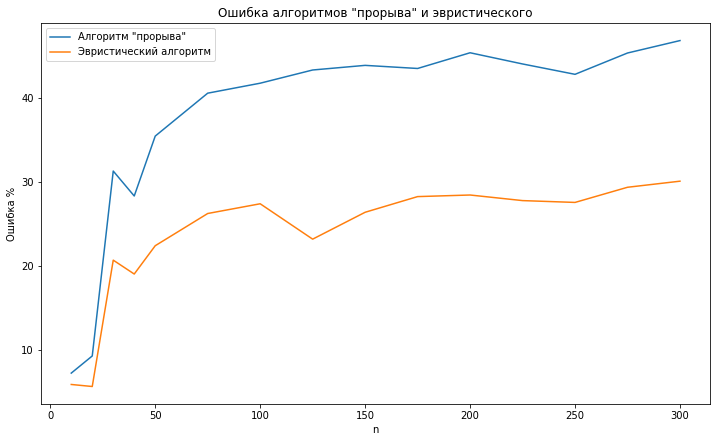

In [71]:
plt.figure(figsize=(12,7))

plt.plot(ns, avg_br_error, label = 'Алгоритм "прорыва"')
plt.plot(ns, avg_he_error, label = 'Эвристический алгоритм')

plt.xlabel('n')
plt.ylabel('Ошибка %')
#plt.yscale("")
plt.title('Ошибка алгоритмов "прорыва" и эвристического')
plt.legend()
plt.savefig('error.png')
plt.show()


## Время работы

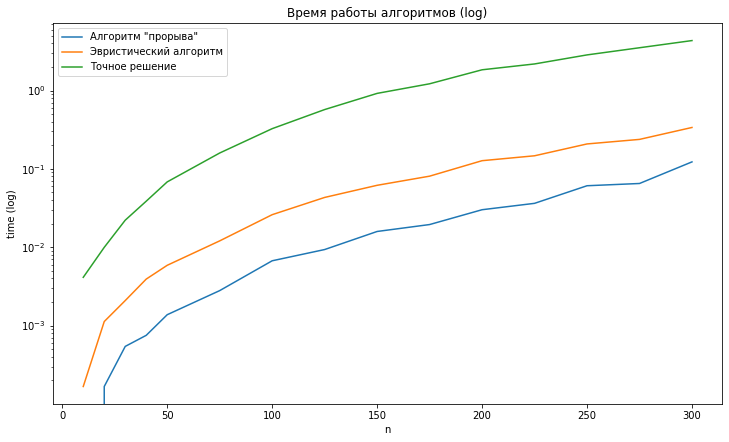

In [72]:
plt.figure(figsize=(12,7))

plt.plot(ns, avg_br_time, label = 'Алгоритм "прорыва"')
plt.plot(ns, avg_he_time, label = 'Эвристический алгоритм')
plt.plot(ns, avg_lp_time, label = 'Точное решение')

plt.xlabel('n')
plt.ylabel('time (log)')
plt.yscale('log')
plt.title('Время работы алгоритмов (log)')
plt.legend()
plt.savefig('time_log.png')
plt.show()

## Отношение максимального потока

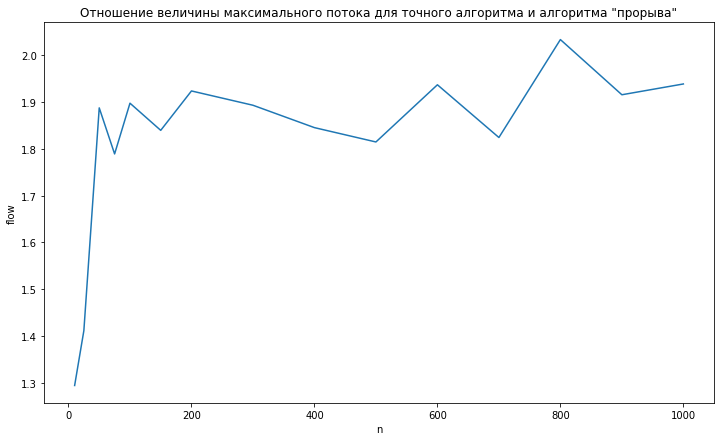

In [41]:
plt.figure(figsize=(12,7))

plt.plot(ns, flow_diff)

plt.xlabel('n')
plt.ylabel('flow')
plt.title('Отношение величины максимального потока для точного алгоритма и алгоритма "прорыва"')
plt.savefig('flow_diff.png')
plt.show()

## Отношение времени работы

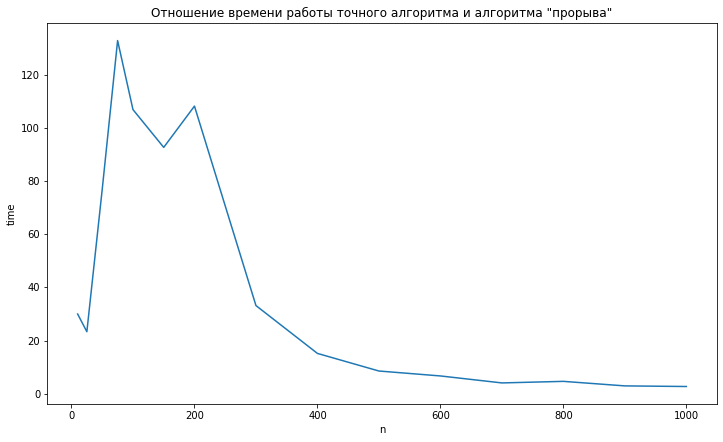

In [42]:
plt.figure(figsize=(12,7))

plt.plot(ns, time_diff)

plt.xlabel('n')
plt.ylabel('time')
plt.title('Отношение времени работы точного алгоритма и алгоритма "прорыва"')
plt.savefig('time_diff.png')
plt.show()